<a href="https://colab.research.google.com/github/adityasingh0912/Heart-Failure-Analysis/blob/main/Heart_failure_analysis_mains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score, recall_score, f1_score,precision_score
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
pip install xgboost

In [ ]:
df=pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
df['c_HeartDisease']=df['HeartDisease'].map({1:'heart disease',0:'Normal'})


In [ ]:
df.describe()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# Data Visualization

<ipython-input-7-268145f0d0b1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='c_HeartDisease', data=df, palette=[ 'green','red'],ax=ax1)


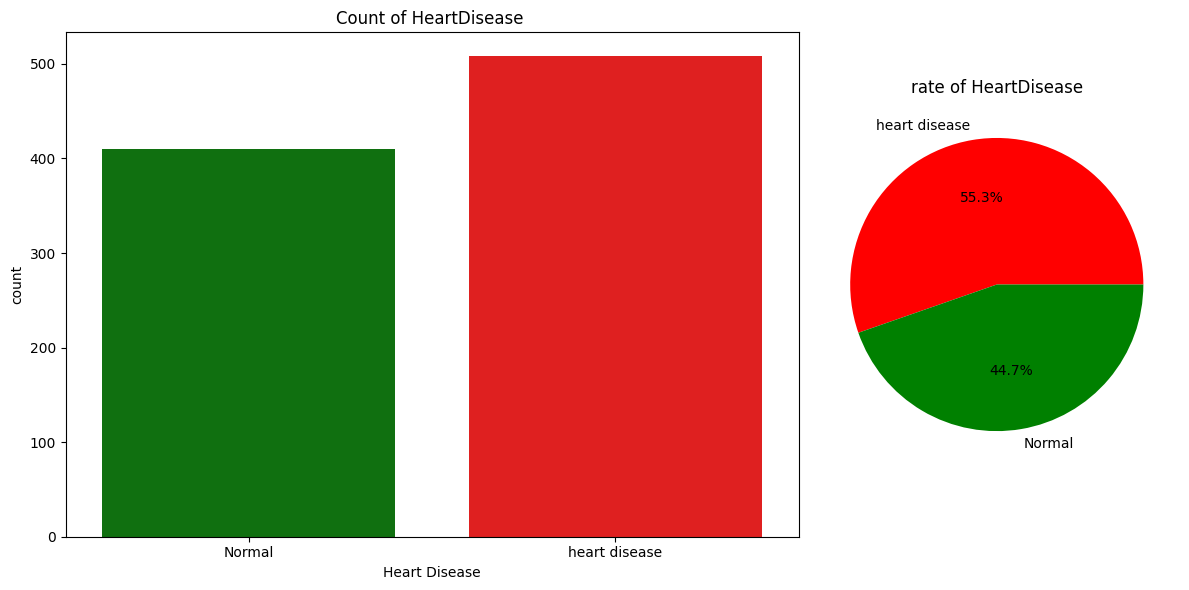

In [ ]:
fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0])
sns.countplot(x='c_HeartDisease', data=df, palette=[ 'green','red'],ax=ax1)
ax1.set_title('Count of HeartDisease ')
ax1.set_xlabel('Heart Disease')

ax2 = fig.add_subplot(gs[1])
types = df['c_HeartDisease'].value_counts()
ax2.pie(types, labels=types.index, autopct='%1.1f%%',colors=['red', 'green'])
ax2.set_title('rate of HeartDisease')

plt.tight_layout()
plt.show()

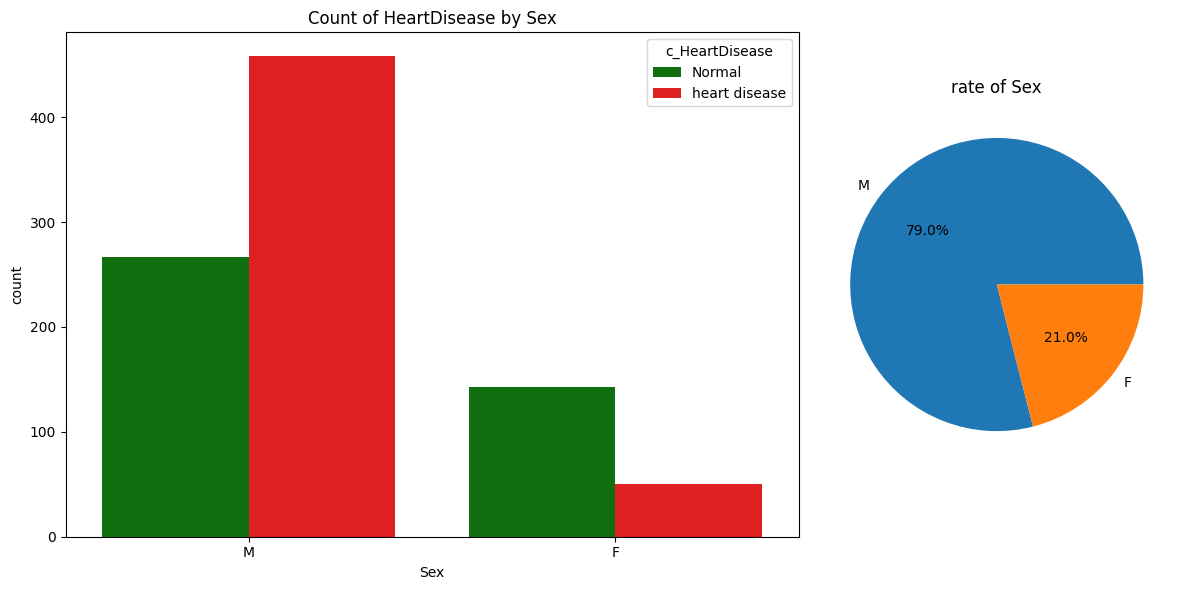

In [ ]:
fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0])
sns.countplot( x='Sex',hue='c_HeartDisease', data=df, palette=[ 'green','red'],ax=ax1)
ax1.set_title('Count of HeartDisease by Sex')
ax1.set_xlabel('Sex')

ax2 = fig.add_subplot(gs[1])
types = df['Sex'].value_counts()
ax2.pie(types, labels=types.index, autopct='%1.1f%%')
ax2.set_title('rate of Sex')

plt.tight_layout()
plt.show()

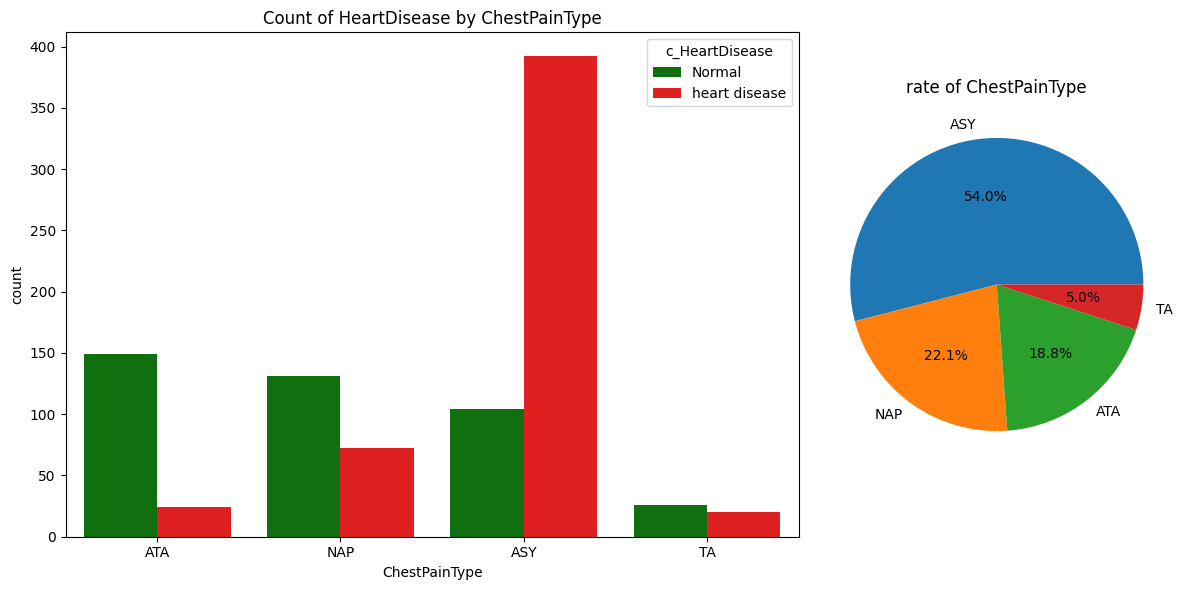

In [ ]:
fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0])
sns.countplot( x='ChestPainType',hue='c_HeartDisease', data=df, palette=[ 'green','red'],ax=ax1)
ax1.set_title('Count of HeartDisease by ChestPainType')


ax2 = fig.add_subplot(gs[1])
types = df['ChestPainType'].value_counts()
ax2.pie(types, labels=types.index, autopct='%1.1f%%')
ax2.set_title('rate of ChestPainType')

plt.tight_layout()
plt.show()

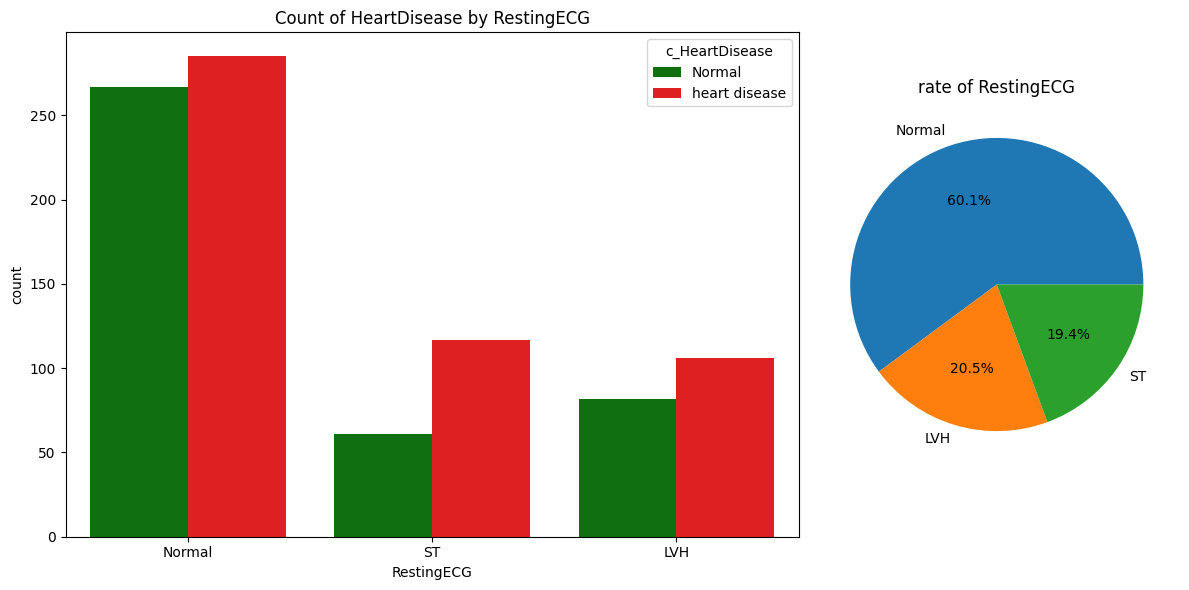

In [ ]:
fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0])
sns.countplot( x='RestingECG',hue='c_HeartDisease', data=df, palette=[ 'green','red'],ax=ax1)
ax1.set_title('Count of HeartDisease by RestingECG')


ax2 = fig.add_subplot(gs[1])
types = df['RestingECG'].value_counts()
ax2.pie(types, labels=types.index, autopct='%1.1f%%')
ax2.set_title('rate of RestingECG')

plt.tight_layout()
plt.show()






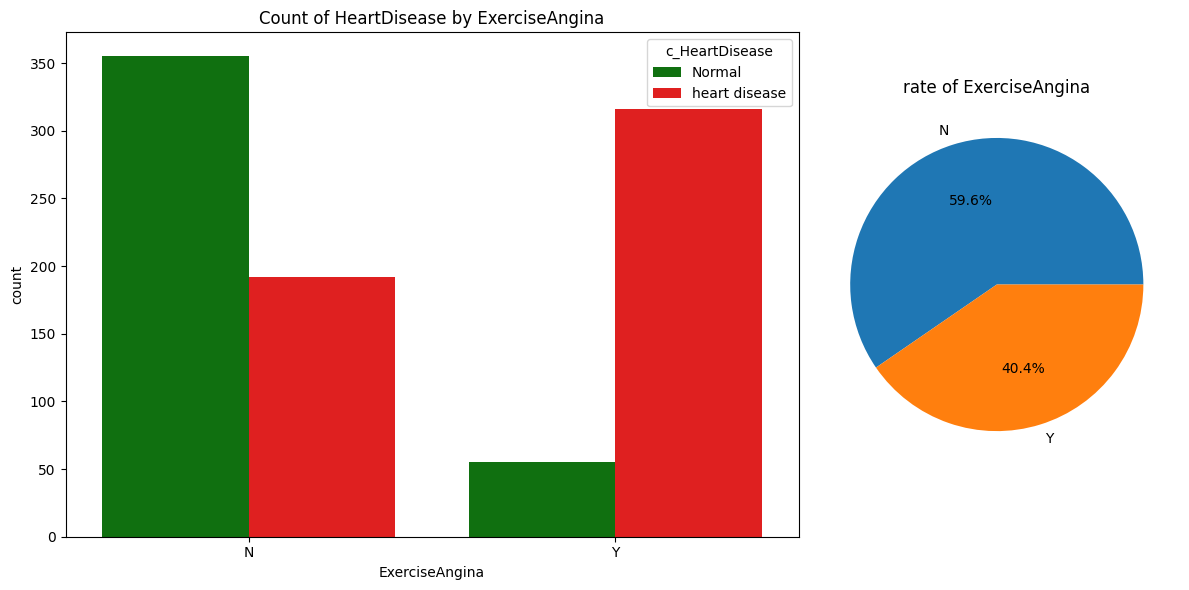

In [ ]:
fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0])
sns.countplot( x='ExerciseAngina',hue='c_HeartDisease', data=df, palette=[ 'green','red'],ax=ax1)
ax1.set_title('Count of HeartDisease by ExerciseAngina')


ax2 = fig.add_subplot(gs[1])
types = df['ExerciseAngina'].value_counts()
ax2.pie(types, labels=types.index, autopct='%1.1f%%')
ax2.set_title('rate of ExerciseAngina')

plt.tight_layout()
plt.show()


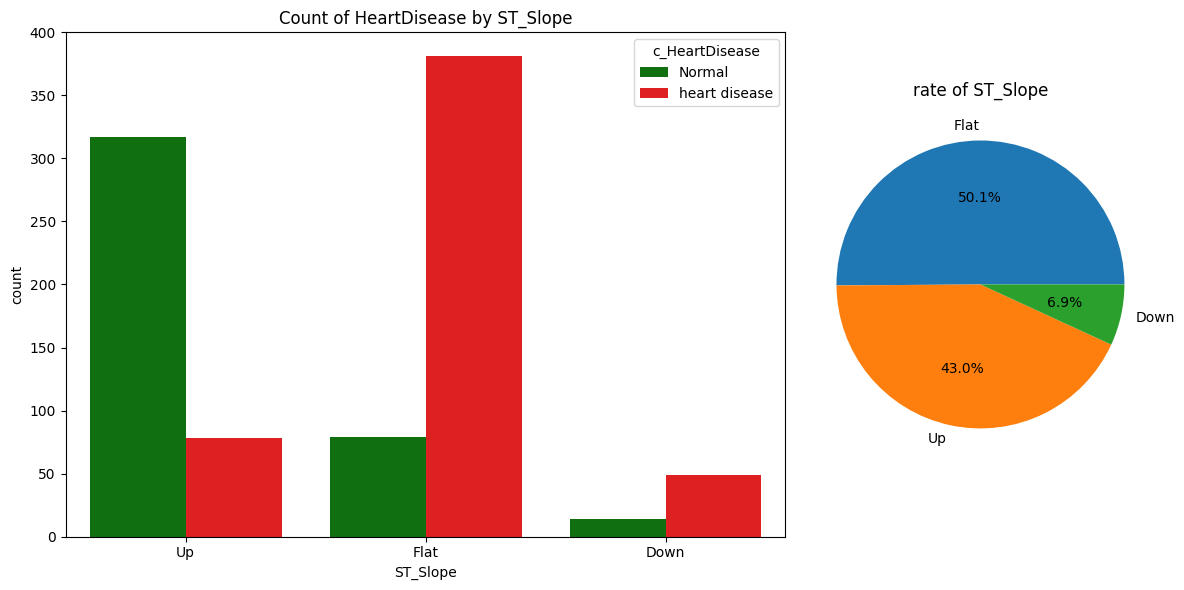

In [ ]:

fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0])
sns.countplot( x='ST_Slope',hue='c_HeartDisease', data=df, palette=[ 'green','red'],ax=ax1)
ax1.set_title('Count of HeartDisease by ST_Slope')


ax2 = fig.add_subplot(gs[1])
types = df['ST_Slope'].value_counts()
ax2.pie(types, labels=types.index, autopct='%1.1f%%')
ax2.set_title('rate of ST_Slope')

plt.tight_layout()
plt.show()

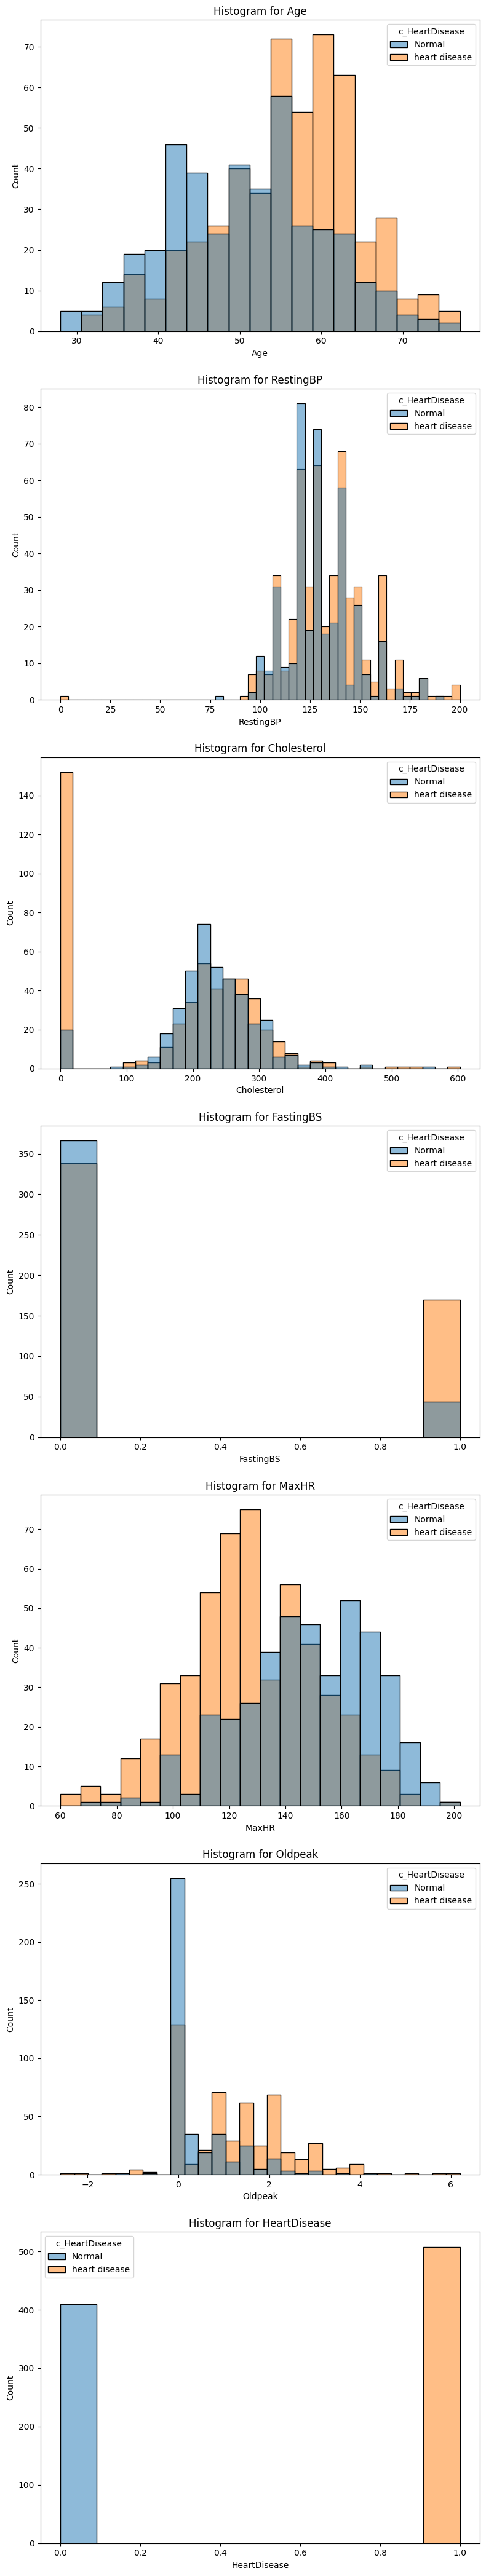

In [ ]:
num_cols=df.select_dtypes(include=['number']).columns
fig, axes = plt.subplots(len(num_cols), 1, figsize=(8, 6 * len(num_cols)))
axes = axes.flatten()
for i, column in enumerate(df[num_cols]):
    sns.histplot(x=df[column], hue=df['c_HeartDisease'], ax=axes[i])
    axes[i].set_title(f'Histogram for {column}')
    axes[i].set_xlabel(column)

plt.tight_layout(h_pad=2, w_pad=2)
plt.show()

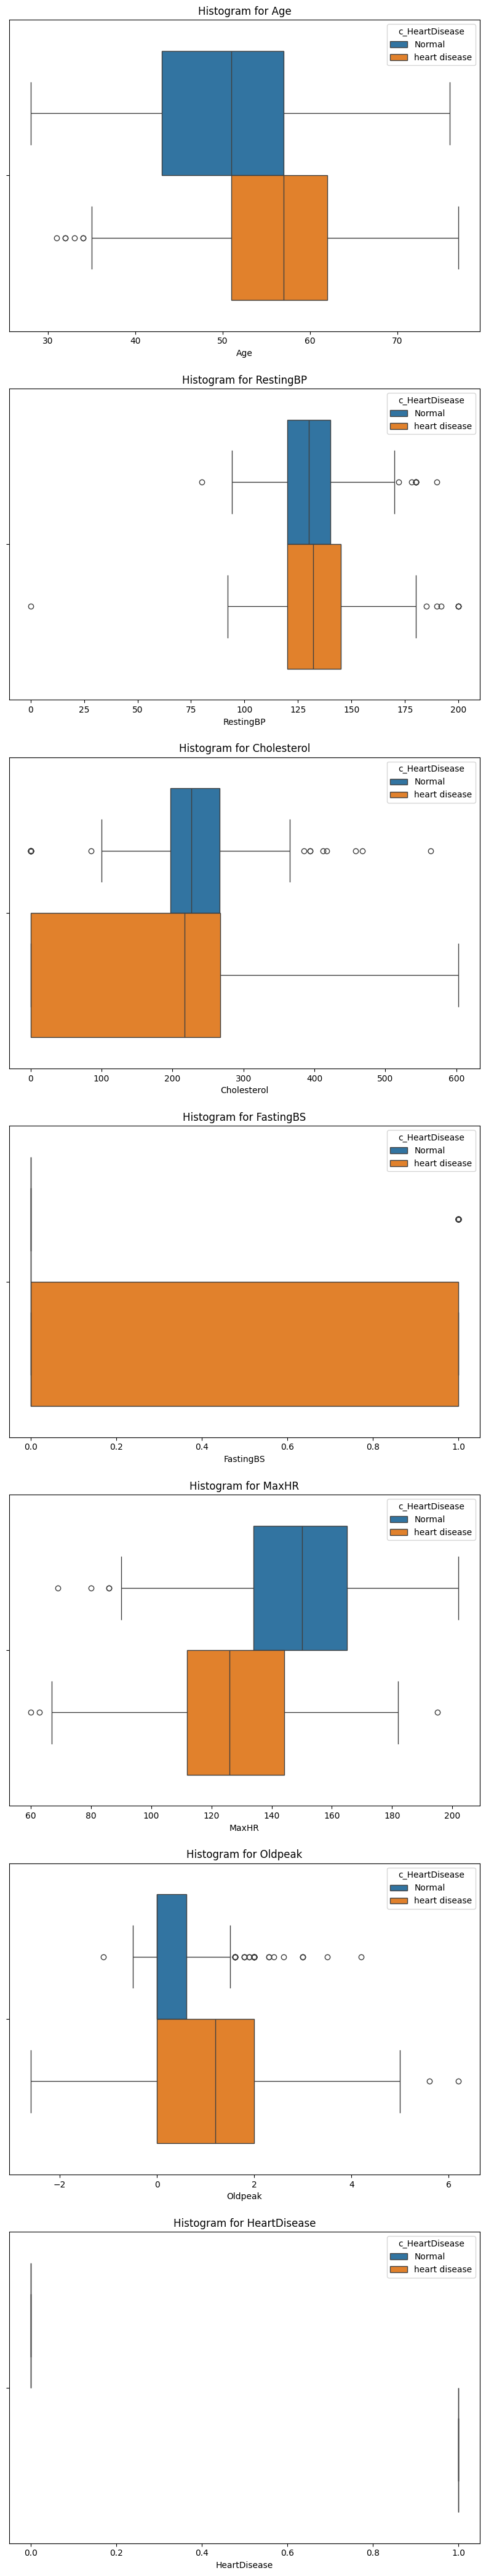

In [ ]:

num_cols=df.select_dtypes(include=['number']).columns
fig, axes = plt.subplots(len(num_cols), 1, figsize=(8, 6 * len(num_cols)))
axes = axes.flatten()
for i, column in enumerate(df[num_cols]):
    sns.boxplot(x=df[column], hue=df['c_HeartDisease'], ax=axes[i])
    axes[i].set_title(f'Histogram for {column}')
    axes[i].set_xlabel(column)

plt.tight_layout(h_pad=2, w_pad=2)
plt.show()

# handle outlier

In [ ]:
def handle_outliers(column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  low_bound = Q1 - 1.5*IQR
  high_bound = Q3 + 1.5*IQR
  df[column] = df[column].clip(lower = low_bound, upper = high_bound)

for column in num_cols:
  handle_outliers(column)

In [ ]:
df.drop('c_HeartDisease',axis=1,inplace=True)

In [ ]:
cat_cols=df.select_dtypes(include=['object']).columns
cat_cols

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

# Label Encoder


In [ ]:
label_encoder = LabelEncoder()
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
df.corr().style.background_gradient(cmap='coolwarm').format("{:.1%}")


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3931: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3932: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,100.0%,5.6%,-7.7%,27.0%,-8.8%,nan%,-0.7%,-38.2%,21.6%,26.3%,-26.8%,28.2%
Sex,5.6%,100.0%,-12.7%,1.7%,-20.4%,nan%,7.2%,-18.9%,19.1%,11.2%,-15.1%,30.5%
ChestPainType,-7.7%,-12.7%,100.0%,-1.2%,6.1%,nan%,-7.3%,28.9%,-35.5%,-17.7%,21.4%,-38.7%
RestingBP,27.0%,1.7%,-1.2%,100.0%,10.7%,nan%,2.5%,-11.3%,15.5%,17.4%,-7.8%,11.3%
Cholesterol,-8.8%,-20.4%,6.1%,10.7%,100.0%,nan%,-19.6%,23.3%,-2.6%,5.4%,11.0%,-22.5%
FastingBS,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
RestingECG,-0.7%,7.2%,-7.3%,2.5%,-19.6%,nan%,100.0%,-17.9%,7.8%,-1.9%,-0.7%,5.7%
MaxHR,-38.2%,-18.9%,28.9%,-11.3%,23.3%,nan%,-17.9%,100.0%,-37.1%,-16.5%,34.4%,-40.1%
ExerciseAngina,21.6%,19.1%,-35.5%,15.5%,-2.6%,nan%,7.8%,-37.1%,100.0%,41.9%,-42.9%,49.4%
Oldpeak,26.3%,11.2%,-17.7%,17.4%,5.4%,nan%,-1.9%,-16.5%,41.9%,100.0%,-50.2%,41.0%


In [ ]:
df.drop('RestingECG',axis=1,inplace=True)
df.drop('FastingBS',axis=1,inplace=True)


In [ ]:
df.corr().style.background_gradient(cmap='coolwarm').format("{:.1%}")

,Age,Sex,ChestPainType,RestingBP,Cholesterol,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,100.0%,5.6%,-7.7%,27.0%,-8.8%,-38.2%,21.6%,26.3%,-26.8%,28.2%
Sex,5.6%,100.0%,-12.7%,1.7%,-20.4%,-18.9%,19.1%,11.2%,-15.1%,30.5%
ChestPainType,-7.7%,-12.7%,100.0%,-1.2%,6.1%,28.9%,-35.5%,-17.7%,21.4%,-38.7%
RestingBP,27.0%,1.7%,-1.2%,100.0%,10.7%,-11.3%,15.5%,17.4%,-7.8%,11.3%
Cholesterol,-8.8%,-20.4%,6.1%,10.7%,100.0%,23.3%,-2.6%,5.4%,11.0%,-22.5%
MaxHR,-38.2%,-18.9%,28.9%,-11.3%,23.3%,100.0%,-37.1%,-16.5%,34.4%,-40.1%
ExerciseAngina,21.6%,19.1%,-35.5%,15.5%,-2.6%,-37.1%,100.0%,41.9%,-42.9%,49.4%
Oldpeak,26.3%,11.2%,-17.7%,17.4%,5.4%,-16.5%,41.9%,100.0%,-50.2%,41.0%
ST_Slope,-26.8%,-15.1%,21.4%,-7.8%,11.0%,34.4%,-42.9%,-50.2%,100.0%,-55.9%
HeartDisease,28.2%,30.5%,-38.7%,11.3%,-22.5%,-40.1%,49.4%,41.0%,-55.9%,100.0%


In [ ]:
df.drop_duplicates(inplace=True)

# Data normalisation

In [ ]:
scaler = MinMaxScaler()
df= pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,1.0,0.333333,0.625,0.683667,0.779412,0.0,0.375000,1.0,0.0
1,0.428571,0.0,0.666667,0.875,0.393000,0.661765,0.0,0.541667,0.5,1.0
2,0.183673,1.0,0.333333,0.500,0.667667,0.235294,0.0,0.375000,1.0,0.0
3,0.408163,0.0,0.000000,0.600,0.483667,0.308824,1.0,0.625000,0.5,1.0
4,0.530612,1.0,0.666667,0.750,0.433000,0.411765,0.0,0.375000,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
912,0.346939,1.0,1.000000,0.250,0.617000,0.485294,0.0,0.575000,0.5,1.0
913,0.816327,1.0,0.000000,0.675,0.427667,0.551471,0.0,0.941667,0.5,1.0
914,0.591837,1.0,0.000000,0.500,0.262333,0.360294,1.0,0.575000,0.5,1.0
915,0.591837,0.0,0.333333,0.500,0.542333,0.794118,0.0,0.375000,0.5,1.0


In [ ]:
x=df.drop('HeartDisease',axis=1)
y=df['HeartDisease']
x

,Age,Sex,ChestPainType,RestingBP,Cholesterol,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,0.244898,1.0,0.333333,0.625,0.683667,0.779412,0.0,0.375000,1.0
1,0.428571,0.0,0.666667,0.875,0.393000,0.661765,0.0,0.541667,0.5
2,0.183673,1.0,0.333333,0.500,0.667667,0.235294,0.0,0.375000,1.0
3,0.408163,0.0,0.000000,0.600,0.483667,0.308824,1.0,0.625000,0.5
4,0.530612,1.0,0.666667,0.750,0.433000,0.411765,0.0,0.375000,1.0
...,...,...,...,...,...,...,...,...,...
912,0.346939,1.0,1.000000,0.250,0.617000,0.485294,0.0,0.575000,0.5
913,0.816327,1.0,0.000000,0.675,0.427667,0.551471,0.0,0.941667,0.5
914,0.591837,1.0,0.000000,0.500,0.262333,0.360294,1.0,0.575000,0.5
915,0.591837,0.0,0.333333,0.500,0.542333,0.794118,0.0,0.375000,0.5


In [ ]:
y

0      0.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
912    1.0
913    1.0
914    1.0
915    1.0
916    0.0
Name: HeartDisease, Length: 917, dtype: float64

# Splitting the data into test and train

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(733, 9)
(184, 9)
(733,)
(184,)


# Logistic Regression

In [ ]:
lr=LogisticRegression()

lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
ypred1_test=lr.predict(x_test)
accuracy1_test = accuracy_score(y_test, ypred1_test)
print(f"Accuracy test: {round(accuracy1_test * 100,2)}%")

ypred1_train=lr.predict(x_train)
accuracy1_train = accuracy_score(y_train, ypred1_train)
print(f"Accuracy train: {round(accuracy1_train * 100,2)}%")

Accuracy test: 84.24%
Accuracy train: 85.13%


In [ ]:
print("Classification Report:")
print(classification_report(y_test, ypred1_test))
pecision1=precision_score(y_test,ypred1_test)
Recall1=recall_score(y_test,ypred1_test)
Fscore1=f1_score(y_test,ypred1_test)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.88      0.82        74
         1.0       0.91      0.82      0.86       110

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184



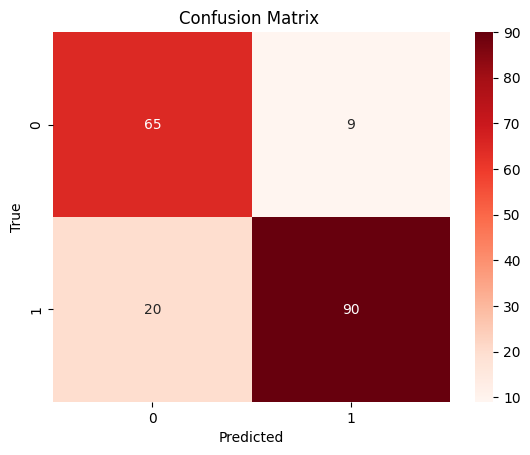

In [ ]:
conf_matrix = confusion_matrix(y_test, ypred1_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix ')
plt.show()

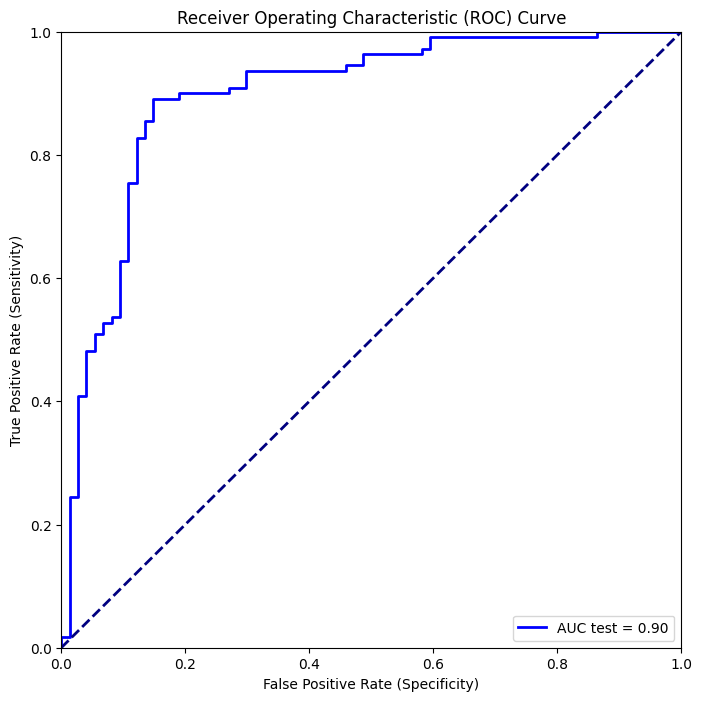

In [ ]:
ypred1_tp=lr.predict_proba(x_test)[:, 1]
roc_auc1 = roc_auc_score(y_test,ypred1_tp)
fpr, tpr, thresholds = roc_curve(y_test, ypred1_tp)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC test = {roc_auc1:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
ypred2_test=knn.predict(x_test)
accuracy2_test = accuracy_score(y_test, ypred2_test)
print(f"Accuracy test: {round(accuracy2_test * 100,2)}%")

ypred2_train=knn.predict(x_train)
accuracy2_train = accuracy_score(y_train, ypred2_train)
print(f"Accuracy train: {round(accuracy2_train * 100,2)}%")

Accuracy test: 83.7%
Accuracy train: 91.0%


In [ ]:
print("Classification Report:")
print(classification_report(y_test, ypred2_test))
pecision2=precision_score(y_test,ypred2_test)
Recall2=recall_score(y_test,ypred2_test)
Fscore2=f1_score(y_test,ypred2_test)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.91      0.82        74
         1.0       0.93      0.79      0.85       110

    accuracy                           0.84       184
   macro avg       0.83      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184



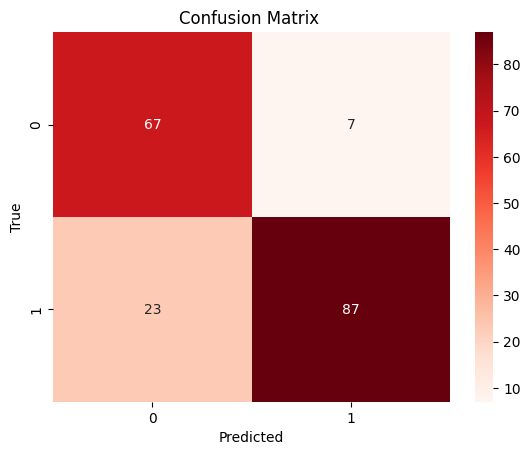

In [ ]:
conf_matrix = confusion_matrix(y_test, ypred2_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix ')
plt.show()

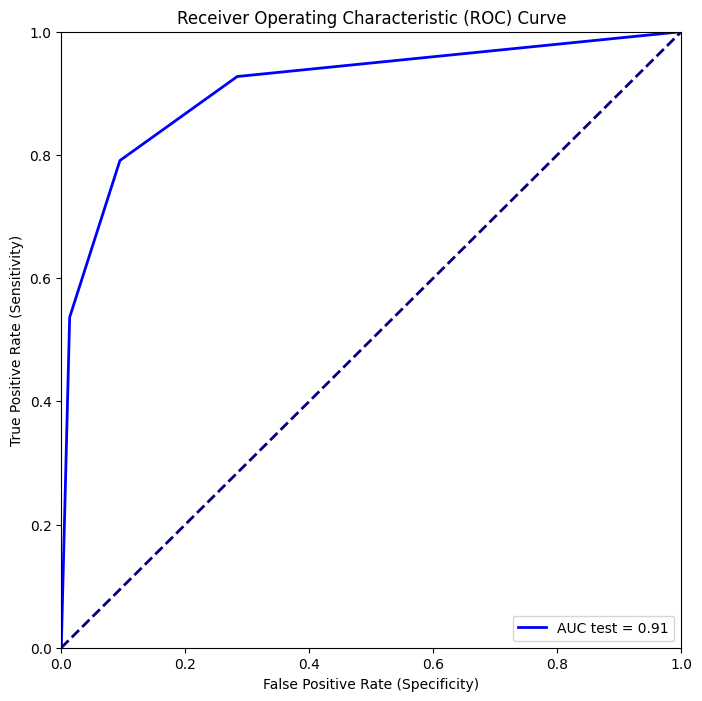

In [ ]:
ypred2_tp=knn.predict_proba(x_test)[:, 1]
roc_auc2 = roc_auc_score(y_test,ypred2_tp)
fpr, tpr, thresholds = roc_curve(y_test, ypred2_tp)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC test = {roc_auc2:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Decision tree

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)


ypred3_test = dt.predict(x_test)

accuracy3_test = accuracy_score(y_test, ypred3_test)
print(f"Test Accuracy: {round(accuracy3_test * 100,2)}%")

ypred3_train = dt.predict(x_train)

accuracy3_train = accuracy_score(y_train, ypred3_train)
print(f"Train Accuracy: {round(accuracy3_train * 100,2)}%")

Test Accuracy: 79.35%
Train Accuracy: 100.0%


In [ ]:
print("Classification Report:")
print(classification_report(y_test, ypred3_test))
pecision3=precision_score(y_test,ypred3_test)
Recall3=recall_score(y_test,ypred3_test)
Fscore3=f1_score(y_test,ypred3_test)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.71      0.82      0.76        74
         1.0       0.87      0.77      0.82       110

    accuracy                           0.79       184
   macro avg       0.79      0.80      0.79       184
weighted avg       0.80      0.79      0.80       184



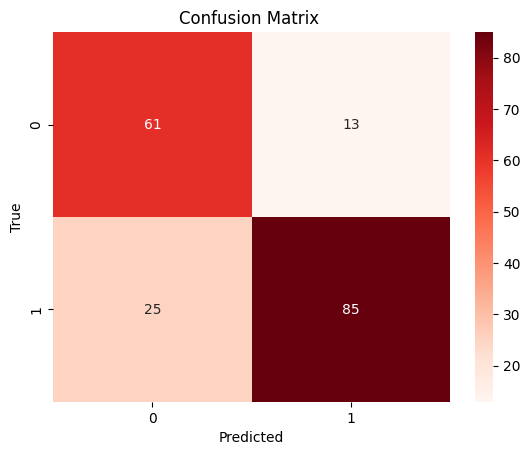

In [ ]:
conf_matrix = confusion_matrix(y_test, ypred3_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix ')
plt.show()

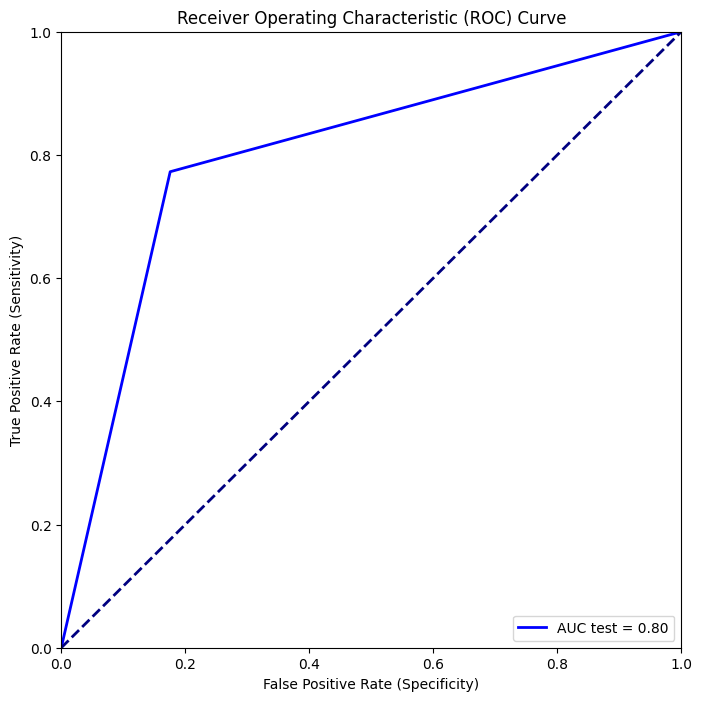

In [ ]:
ypred3_tp=dt.predict_proba(x_test)[:, 1]
roc_auc3 = roc_auc_score(y_test,ypred3_tp)
fpr, tpr, thresholds = roc_curve(y_test, ypred3_tp)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC test = {roc_auc3:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Random forest classifier

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
ypred4_test = rf.predict(x_test)

accuracy4_test = accuracy_score(y_test, ypred4_test)
print(f"Test Accuracy: {round(accuracy4_test * 100,2)}%")

ypred4_train = rf.predict(x_train)

accuracy4_train = accuracy_score(y_train, ypred4_train)
print(f"Train Accuracy: {round(accuracy4_train * 100,2)}%")

Test Accuracy: 86.41%
Train Accuracy: 100.0%


In [ ]:
print("Classification Report:")
print(classification_report(y_test, ypred4_test))
pecision4=precision_score(y_test,ypred4_test)
Recall4=recall_score(y_test,ypred4_test)
Fscore4=f1_score(y_test,ypred4_test)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.89      0.84        74
         1.0       0.92      0.85      0.88       110

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.87       184



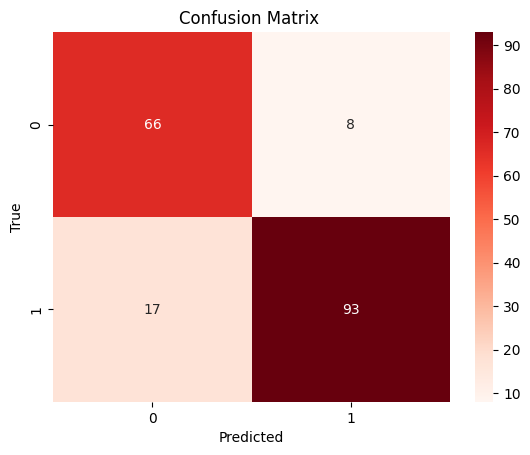

In [ ]:
conf_matrix = confusion_matrix(y_test, ypred4_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix ')
plt.show()

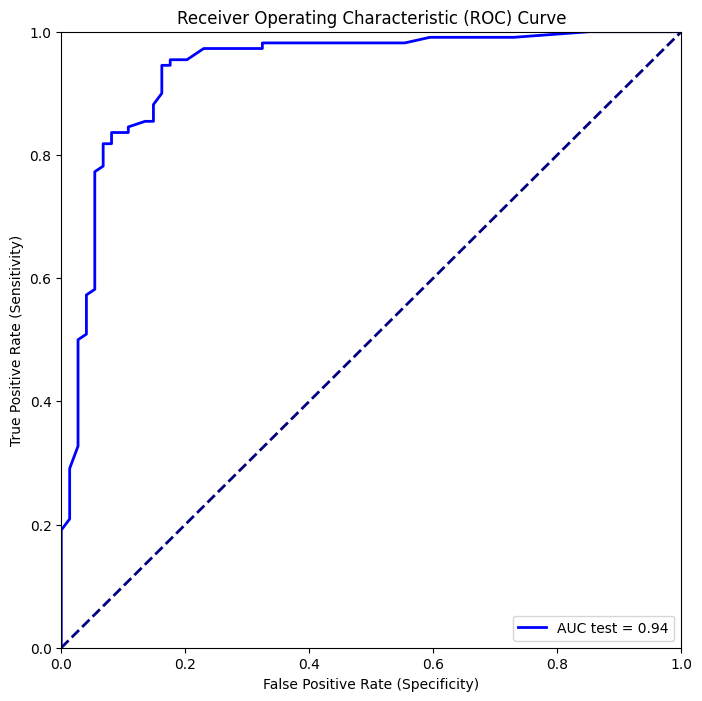

In [ ]:
ypred4_tp=rf.predict_proba(x_test)[:, 1]
roc_auc4 = roc_auc_score(y_test,ypred4_tp)
fpr, tpr, thresholds = roc_curve(y_test, ypred4_tp)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC test = {roc_auc4:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# XGB

In [ ]:
xgb= XGBClassifier(random_state=42)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
ypred5_test = xgb.predict(x_test)

accuracy5_test = accuracy_score(y_test, ypred5_test)
print(f"Test Accuracy: {round(accuracy5_test * 100,2)}%")

ypred5_train = rf.predict(x_train)

accuracy5_train = accuracy_score(y_train, ypred5_train)
print(f"Train Accuracy: {round(accuracy5_train * 100,2)}%")

Test Accuracy: 85.33%
Train Accuracy: 100.0%


In [ ]:
print("Classification Report:")
print(classification_report(y_test, ypred5_test))
pecision5=precision_score(y_test,ypred5_test)
Recall5=recall_score(y_test,ypred5_test)
Fscore5=f1_score(y_test,ypred5_test)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.88      0.83        74
         1.0       0.91      0.84      0.87       110

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



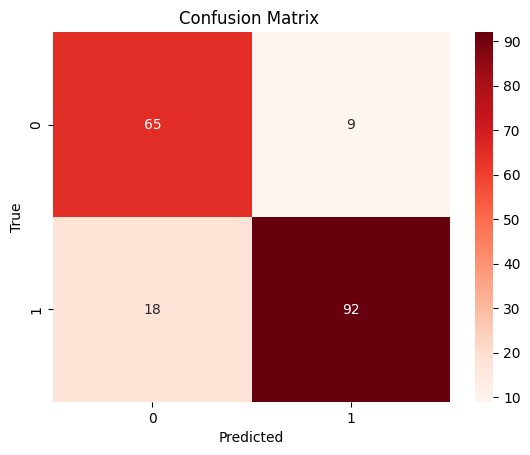

In [ ]:
conf_matrix = confusion_matrix(y_test, ypred5_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix ')
plt.show()

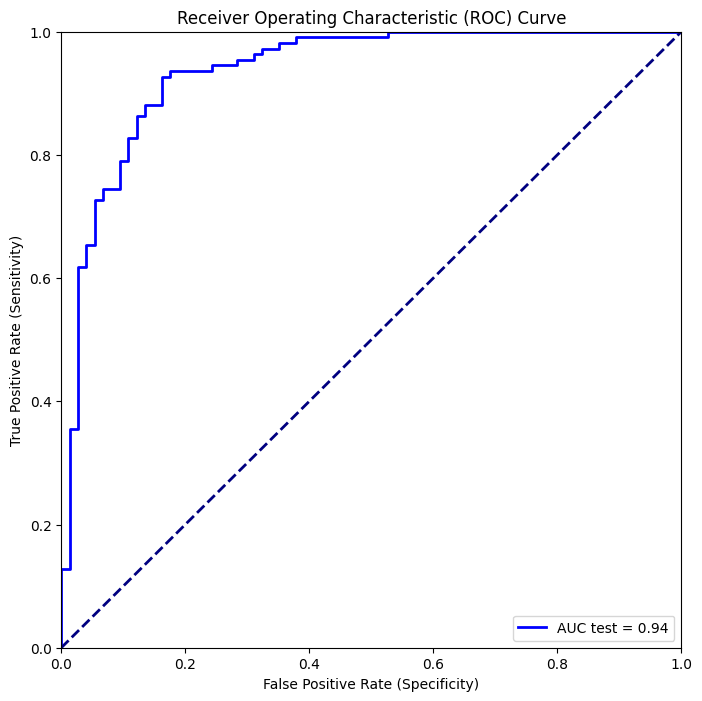

In [ ]:
ypred5_tp=xgb.predict_proba(x_test)[:, 1]
roc_auc5 = roc_auc_score(y_test,ypred5_tp)
fpr, tpr, thresholds = roc_curve(y_test, ypred5_tp)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC test = {roc_auc5:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# SVM

In [ ]:


svc = SVC(random_state=42)
svc.fit(x_train, y_train)

SVC(random_state=42)

In [ ]:
ypred6_test = svc.predict(x_test)

accuracy6_test = accuracy_score(y_test, ypred6_test)
print(f"Test Accuracy: {round(accuracy6_test * 100,2)}%")

ypred6_train = rf.predict(x_train)

accuracy6_train = accuracy_score(y_train, ypred6_train)
print(f"Train Accuracy: {round(accuracy6_train * 100,2)}%")

Test Accuracy: 88.59%
Train Accuracy: 100.0%


In [ ]:
print("Classification Report:")
print(classification_report(y_test, ypred6_test))
pecision6=precision_score(y_test,ypred6_test)
Recall6=recall_score(y_test,ypred6_test)
Fscore6=f1_score(y_test,ypred6_test)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.86      0.86        74
         1.0       0.91      0.90      0.90       110

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



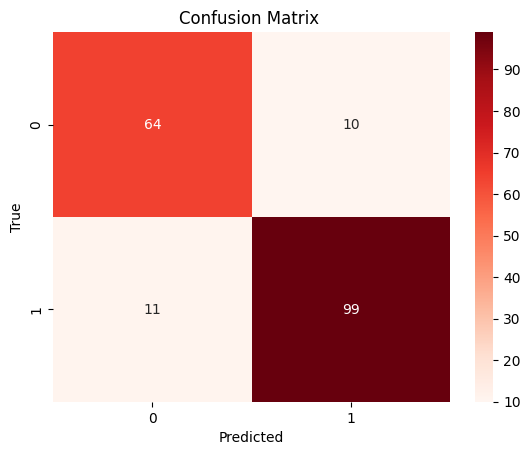

In [ ]:
conf_matrix = confusion_matrix(y_test, ypred6_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix ')
plt.show()

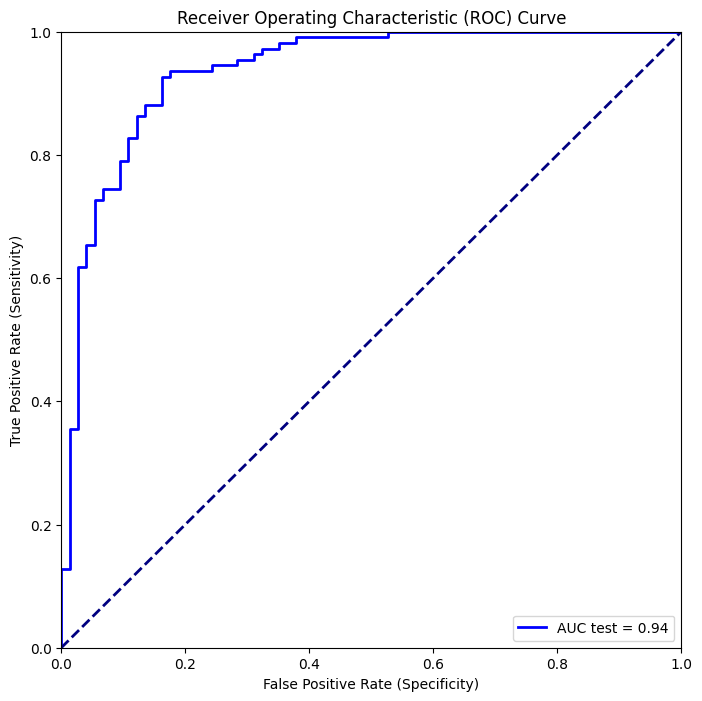

In [ ]:
ypred6_tp=xgb.predict_proba(x_test)[:, 1]
roc_auc6 = roc_auc_score(y_test,ypred6_tp)
fpr, tpr, thresholds = roc_curve(y_test, ypred6_tp)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC test = {roc_auc6:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
models=pd.DataFrame({
   'Model':
    [ 'Logistic Regression','K Nearest Neighbors','Decision Tree','Random Forest','XG-Boost','SVM'],
   'Accuracy test':
    [accuracy1_test,accuracy2_test,accuracy3_test,accuracy4_test,accuracy5_test,accuracy6_test],
   'Accuracy train':
    [accuracy1_train,accuracy2_train,accuracy3_train,accuracy4_train,accuracy5_train,accuracy6_train],
   'AUC-ROC':
    [roc_auc1,roc_auc2,roc_auc3,roc_auc4,roc_auc5,roc_auc6],
   'cost possitive':
    [pecision1,pecision2,pecision3,pecision4,pecision5,pecision6],
   'cost negatives':
    [Recall1,Recall2,Recall3,Recall4,Recall5,Recall6],
   'mean cost P and cost N':
    [Fscore1,Fscore2,Fscore3,Fscore4,Fscore5,Fscore6]
})

In [ ]:
models

,Model,Accuracy test,Accuracy train,AUC-ROC,cost possitive,cost negatives,mean cost P and cost N
0,Logistic Regression,0.842391,0.851296,0.896560,0.909091,0.818182,0.861244
1,K Nearest Neighbors,0.836957,0.909959,0.910135,0.925532,0.790909,0.852941
2,Decision Tree,0.793478,1.000000,0.798526,0.867347,0.772727,0.817308
3,Random Forest,0.864130,1.000000,0.938022,0.920792,0.845455,0.881517
4,XG-Boost,0.853261,1.000000,0.937101,0.910891,0.836364,0.872038
5,SVM,0.885870,1.000000,0.937101,0.908257,0.900000,0.904110


In [ ]:
models = models.sort_values(by='Accuracy test', ascending=False)
plt.figure(figsize = (14, 8))
fig = px.bar(models, x = 'Model', y ='Accuracy test',pattern_shape = 'Accuracy test',color = 'Model')

fig.show()

<Figure size 1400x800 with 0 Axes>